In [2]:
# ==========================================
# SETUP BLOCK 
# ==========================================

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# ---- Imports from project files ----
sys.path.append(os.path.abspath(".."))
from Helper_funtions import (
    clean_up_subjects,
    calculate_true_false_score,
    calculate_Internet_terms_understanding_score,
    group_internet_understanding
)
from lists import (
    demographic_columns,
    multiple_choice_questions,
    single_choice_questions,
    likert_questions,
    likert_mapping,
    comparison_pairs_by_AI_questions,
    cross_tab_titles_and_colors

)
from answer_categories import question_orders

# ---- General plot style ----
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# ---- Data loading ----
DATA_FILE = os.path.join("..", "Data", "Fertige Tabelle.xlsx")
df = pd.read_excel(DATA_FILE)
df.columns = df.columns.str.strip()

# Clean up multi-subject columns
for col in ["Most used subjects", "Preferred Subjects", "Least preferred Subjects"]:
    if col in df.columns:
        df = clean_up_subjects(df, col)

# Calculate additional scores
if all(q in df.columns for q in ["True/False_1", "True/False_2"]):
    df = calculate_true_false_score(df)

if any(col.startswith("Internet terms_") for col in df.columns):
    df = calculate_Internet_terms_understanding_score(df)
    df = group_internet_understanding(df)

print("✅ Setup complete – DataFrame loaded and preprocessed")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")

✅ Setup complete – DataFrame loaded and preprocessed
Rows: 203, Columns: 43


c:\Users\tills\Bachelor-Code\Analyse_Files\Helper_funtions.py:124: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapped = df[internet_cols].replace(Internet_terms_mapping)


In [ ]:
# ------- cross-tables with graphs, graphs with seperated bars -------

for demo, question_list in comparison_pairs_by_AI_questions.items(): 
    for question in question_list:
        try:
            relevant_cols = [demo, question]
            data = df[relevant_cols].dropna()

            # Handle exploding if any of the two is multiple choice
            for col in relevant_cols:
                if col in multiple_choice_questions:
                    data[col] = data[col].astype(str).str.split(",")
                    data = data.explode(col)
                    data[col] = data[col].str.strip()

            # Drop any remaining empty entries
            data = data.dropna()
            data = data[(data[demo].astype(str).str.strip() != "") & (data[question].astype(str).str.strip() != "")]

            # Crosstab normalized by row (percentages)
            cross = pd.crosstab(data[demo], data[question], normalize='index') * 100

            # Apply predefined order
            if question in question_orders:
                order = question_orders[question]
                for col in order:
                    if col not in cross.columns:
                        cross[col] = 0
                cross = cross[order]

            if pd.api.types.is_numeric_dtype(data[demo]):
                cross = cross.sort_index()

            print(f"\n📊 {question} grouped by {demo}")
            print(cross.round(1).to_string())

            # Plot
            plot_df = cross.reset_index().melt(id_vars=demo, var_name="Answer", value_name="Percentage")

            plt.figure(figsize=(10, 6))
            sns.barplot(data=plot_df, x="Answer", y="Percentage", hue=demo)
            plt.title(f"{question} grouped by {demo}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Test failed for {question} x {demo}: {e}")



📊 Usefullness AI within each Use AI school and freetime (rows sum to 100%)
Counts:
 Usefullness AI              Sehr nützlich  Ziemlich nützlich  Teils/teils  \
Use AI school and freetime                                                  
Täglich                                42                 13            1   
Mehrmals pro Woche                     20                 29           19   
Etwa 1 Mal pro Woche                    3                 21           12   
Seltener                                0                 10           19   

Usefullness AI              Wenig nützlich  
Use AI school and freetime                  
Täglich                                  0  
Mehrmals pro Woche                       0  
Etwa 1 Mal pro Woche                     2  
Seltener                                 2  

Percent:
 Usefullness AI              Sehr nützlich  Ziemlich nützlich  Teils/teils  \
Use AI school and freetime                                                  
Täglich          

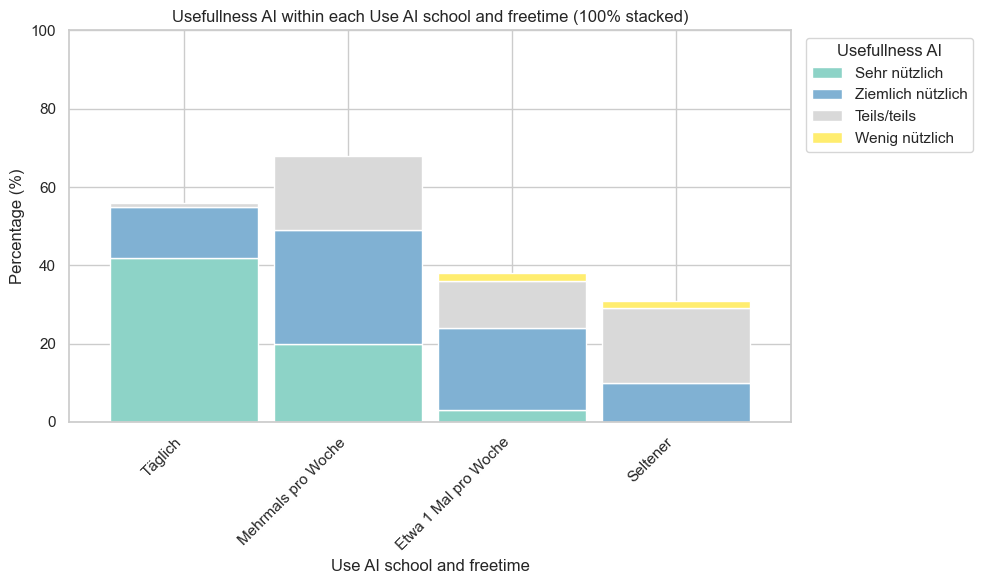


📊 Concerns AI within each Use AI school and freetime (rows sum to 100%)
Counts:
 Concerns AI                 Ja  Nein  Ich habe darüber noch nie nachgedacht.
Use AI school and freetime                                                  
Täglich                     18    31                                       7
Mehrmals pro Woche          32    23                                      13
Etwa 1 Mal pro Woche        12    10                                      16
Seltener                    14     6                                      11
Nie                          3     4                                       3

Percent:
 Concerns AI                   Ja  Nein  Ich habe darüber noch nie nachgedacht.
Use AI school and freetime                                                    
Täglich                     32.1  55.4                                    12.5
Mehrmals pro Woche          47.1  33.8                                    19.1
Etwa 1 Mal pro Woche        31.6  26.3              

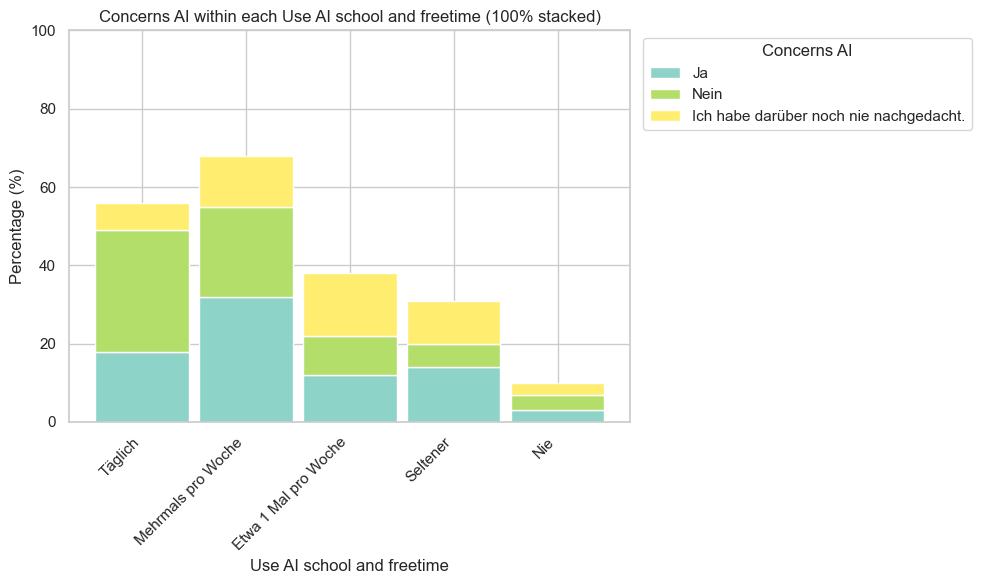


📊 Most used subjects within each Use AI school and freetime (rows sum to 100%)
Counts:
 Most used subjects          Berufsorientierung  Biologie  Chemie  Deutsch  \
Use AI school and freetime                                                  
Täglich                                      0        17      11       13   
Mehrmals pro Woche                           0        13      14       21   
Etwa 1 Mal pro Woche                         1         3       3       13   
Seltener                                     2         3       5       10   
Nie                                          0         0       0        1   

Most used subjects          Englisch  Französisch  Geografie  Geschichte  \
Use AI school and freetime                                                 
Täglich                            8           16         13          28   
Mehrmals pro Woche                10           18         21          31   
Etwa 1 Mal pro Woche               7           12          9       

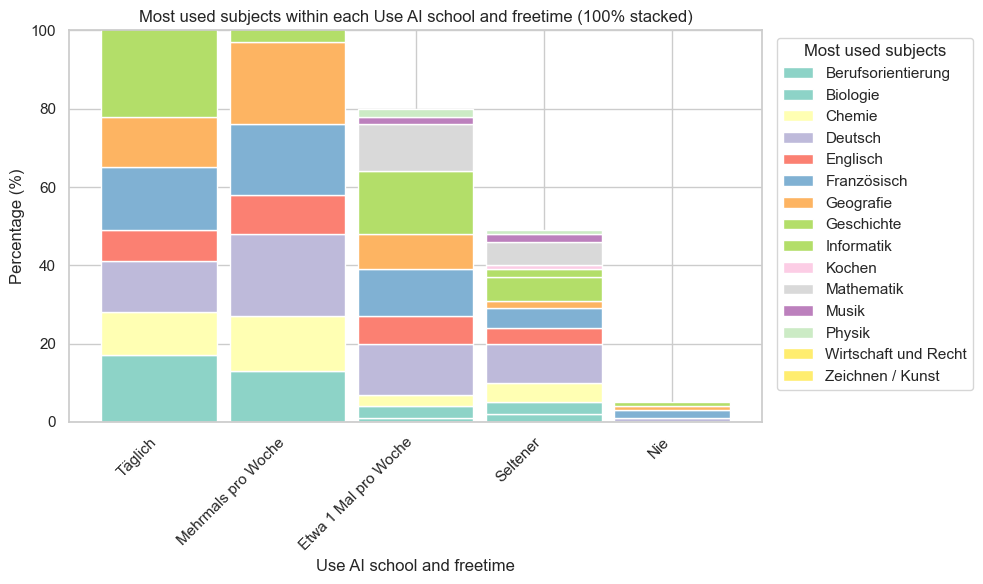


📊 Reliability AI within each Use AI school and freetime (rows sum to 100%)
Counts:
 Reliability AI              Sehr verlässlich  Eher verlässlich  Teils/teils  \
Use AI school and freetime                                                    
Täglich                                    6                31           17   
Mehrmals pro Woche                         3                35           24   
Etwa 1 Mal pro Woche                       1                12           20   
Seltener                                   0                 4           20   
Nie                                        0                 2            5   

Reliability AI              Wenig verlässlich  Gar nicht verlässlich  \
Use AI school and freetime                                             
Täglich                                     2                      0   
Mehrmals pro Woche                          5                      1   
Etwa 1 Mal pro Woche                        3                      0   
S

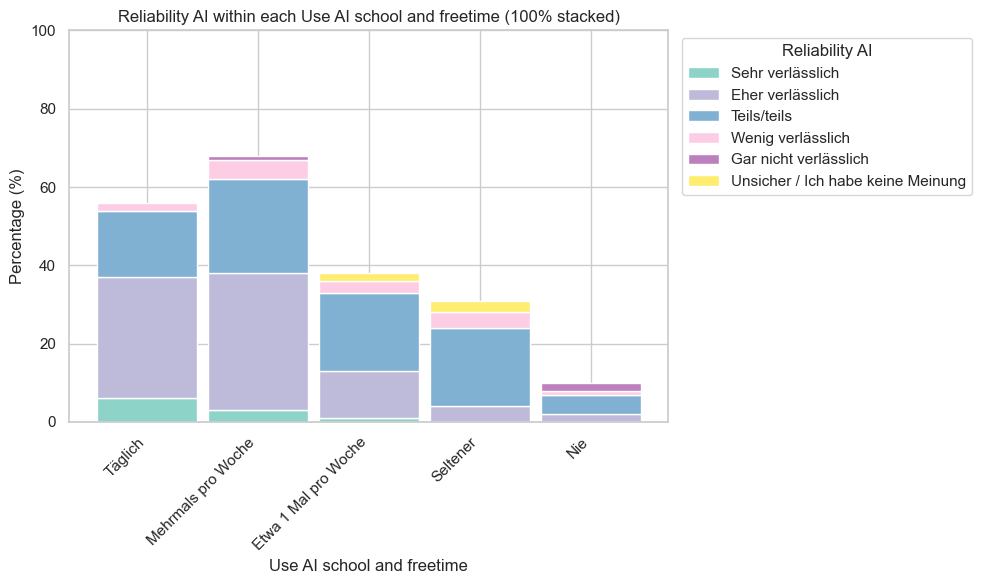


📊 Mates using AI within each Use AI school and freetime (rows sum to 100%)
Counts:
 Mates using AI              Selten  Manchmal  Oft  Immer
Use AI school and freetime                              
Täglich                          0         1   36     18
Mehrmals pro Woche               0        11   47      9
Etwa 1 Mal pro Woche             1        16   18      3
Seltener                         2        12   15      2
Nie                              2         3    5      0

Percent:
 Mates using AI              Selten  Manchmal   Oft  Immer
Use AI school and freetime                               
Täglich                        0.0       1.8  65.5   32.7
Mehrmals pro Woche             0.0      16.4  70.1   13.4
Etwa 1 Mal pro Woche           2.6      42.1  47.4    7.9
Seltener                       6.5      38.7  48.4    6.5
Nie                           20.0      30.0  50.0    0.0


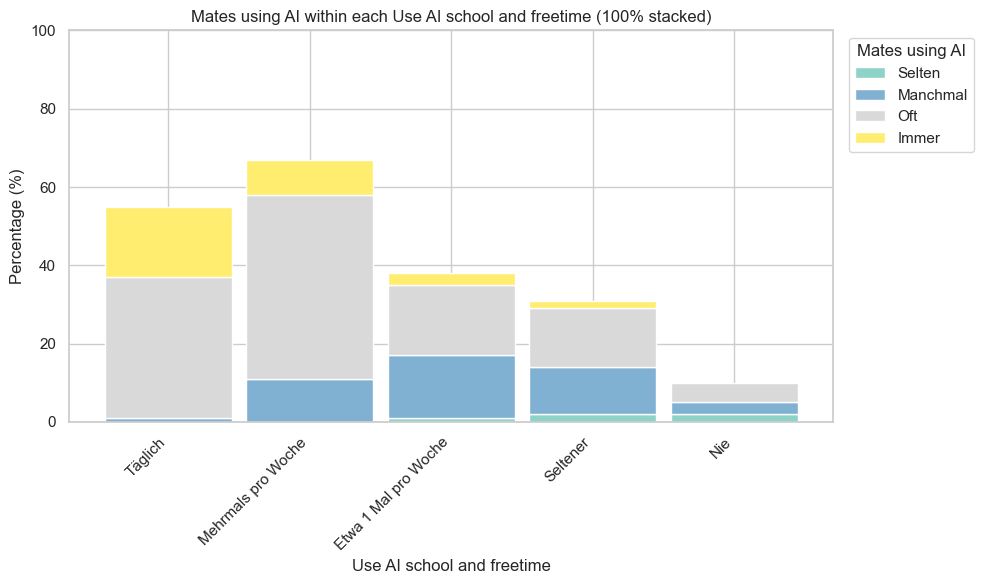


📊 Help of AI within each Use AI school and freetime (rows sum to 100%)
Counts:
 Help of AI                  Sehr gut  Eher gut  Neutral  Eher schlecht
Use AI school and freetime                                            
Täglich                           17        26        8              1
Mehrmals pro Woche                 9        39       14              3
Etwa 1 Mal pro Woche               3        16       15              1
Seltener                           1         8       12              6
Nie                                2         0        0              1

Percent:
 Help of AI                  Sehr gut  Eher gut  Neutral  Eher schlecht
Use AI school and freetime                                            
Täglich                         32.7      50.0     15.4            1.9
Mehrmals pro Woche              13.8      60.0     21.5            4.6
Etwa 1 Mal pro Woche             8.6      45.7     42.9            2.9
Seltener                         3.7      29.6     44.4 

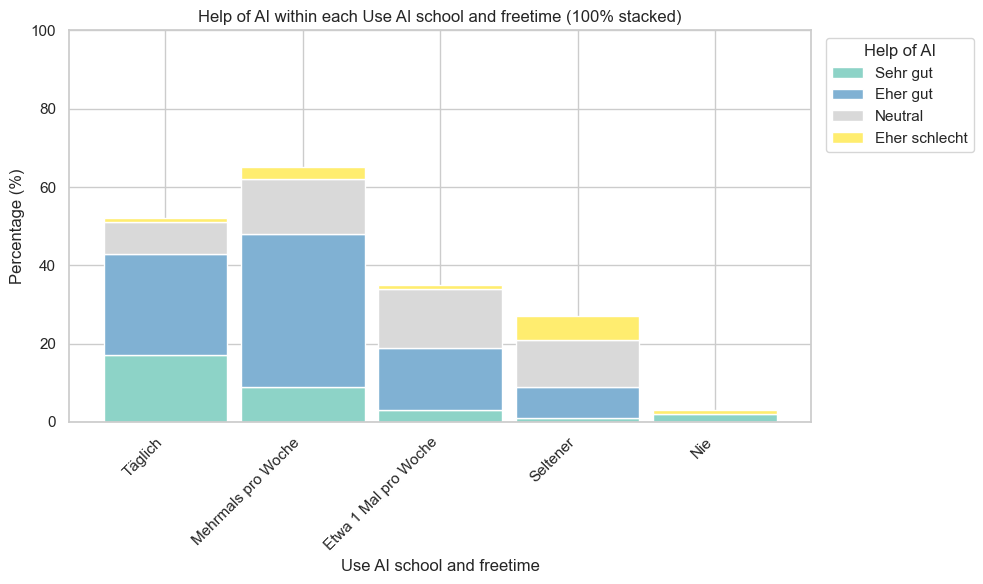


📊 Deal with AI within each Use AI school and freetime (rows sum to 100%)
Counts:
 Deal with AI                Sehr gut  Eher gut  Weder gut noch schlecht  \
Use AI school and freetime                                                
Täglich                           24        26                        5   
Mehrmals pro Woche                15        35                       18   
Etwa 1 Mal pro Woche               6        16                       15   
Seltener                           2        12                       12   
Nie                                0         6                        3   

Deal with AI                Eher schlecht  Schlecht  
Use AI school and freetime                           
Täglich                                 1         0  
Mehrmals pro Woche                      0         0  
Etwa 1 Mal pro Woche                    1         0  
Seltener                                4         1  
Nie                                     1         0  

Percent:
 De

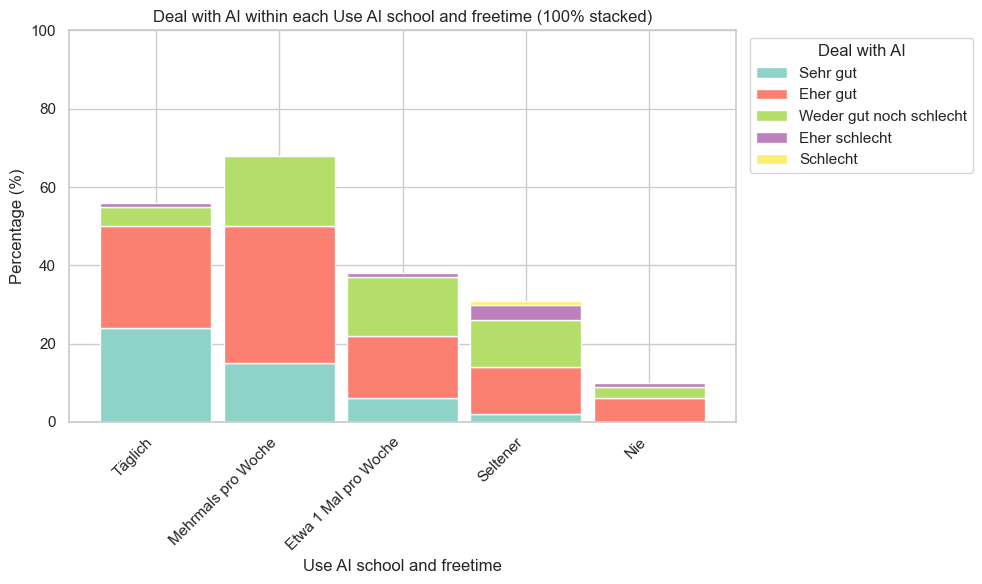

KeyError: "['Understanding of AI'] not in index"

In [3]:
# ------ 100% stacked bar charts (no significance tests) ------

def build_pair_dataframe(df_in: pd.DataFrame, left: str, right: str) -> pd.DataFrame:
    left_is_multi  = left  in multiple_choice_questions
    right_is_multi = right in multiple_choice_questions

    tmp = df_in[[left, right]].dropna().copy()

    if left_is_multi:
        tmp[left] = tmp[left].astype(str).str.split(",")
        tmp = tmp.explode(left)
    else:
        tmp[left] = tmp[left].astype(str).str.strip()

    if right_is_multi:
        tmp[right] = tmp[right].astype(str).str.split(",")
        tmp = tmp.explode(right)
    else:
        tmp[right] = tmp[right].astype(str).str.strip()

    # strip after explode & drop empties
    tmp[left]  = tmp[left].astype(str).str.strip()
    tmp[right] = tmp[right].astype(str).str.strip()
    tmp = tmp[(tmp[left] != "") & (tmp[right] != "")]
    return tmp


def order_rows_cols(ct: pd.DataFrame, rows_key: str, cols_key: str) -> pd.DataFrame:
    # columns
    if cols_key in question_orders:
        col_order = [v for v in question_orders[cols_key] if v in ct.columns]
        remaining_cols = [v for v in ct.columns if v not in col_order]
        ct = ct[col_order + remaining_cols]
    else:
        try:
            ct = ct[sorted(ct.columns, key=lambda x: float(x))]
        except Exception:
            pass

    # rows
    if rows_key in question_orders:
        row_order = [v for v in question_orders[rows_key] if v in ct.index]
        remaining_rows = [v for v in ct.index if v not in row_order]
        ct = ct.reindex(row_order + remaining_rows)
    else:
        try:
            ct.index = pd.to_numeric(ct.index)
            ct = ct.sort_index()
        except Exception:
            pass
    return ct


for base_question, compare_list in comparison_pairs_by_AI_questions.items():
    for compare_question in compare_list:
        # 1) Daten vorbereiten
        data = build_pair_dataframe(df, base_question, compare_question)
        if data.empty:
            print(f"⚠️ No overlapping data for '{base_question}' × '{compare_question}'. Skipping.")
            continue

        # 2) Crosstab (Counts)
        ct = pd.crosstab(data[base_question], data[compare_question])

        # ggf. zusammenfassen, falls doppelte Labels
        if not ct.columns.is_unique:
            ct = ct.T.groupby(level=0).sum().T
        if not ct.index.is_unique:
            ct = ct.groupby(level=0).sum()

        # 3) Reihenfolge anwenden
        ct = order_rows_cols(ct, rows_key=base_question, cols_key=compare_question)

        # 4) 100%-Normalisierung je Zeile (nur wo Summe > 0)
        row_sums = ct.sum(axis=1)
        #for 100% stacked bars    
        ct_percent = ct.div(row_sums.replace(0, pd.NA), axis=0) * 100
        ct_percent = ct_percent.fillna(0)
        
        # 5) Ausgabe
        print(f"\n📊 {compare_question} within each {base_question} (rows sum to 100%)")
        print("Counts:\n", ct)
        print("\nPercent:\n", ct_percent.round(1))

        # 6) Plot
        title_and_colors = cross_tab_titles_and_colors.get(
            (base_question, compare_question),
            [f"{compare_question} within each {base_question} (100% stacked)"]
        )
        plot_title = title_and_colors[0]

        if len(title_and_colors) > 1:
            colors = title_and_colors[1:]
            ax = ct.plot(kind="bar", stacked=True, figsize=(10, 6), color=colors, width=0.9)
        else:
            ax = ct.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3", width=0.9)

        ax.set_title(plot_title)
        ax.set_ylabel("Percentage (%)")
        ax.set_xlabel(base_question)
        ax.set_ylim(0, 100)
        plt.xticks(rotation=45, ha="right")
        plt.legend(title=compare_question, bbox_to_anchor=(1.01, 1), loc="upper left")
        plt.tight_layout()
        plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Mapping der Verlässlichkeit (0er nur zur Filterung; sie werden ausgeschlossen) ----
score_map = {
    # 5
    "Sehr verlässlich": 5, "Very reliable": 5,
    # 4
    "Eher verlässlich": 4, "Rather reliable": 4, "Fairly reliable": 4,
    # 3
    "Teils/teils": 3, "Mixed": 3, "Neither": 3, "Neutral": 3,
    # 2
    "Wenig verlässlich": 2, "Not very reliable": 2,
    # 1
    "Gar nicht verlässlich": 1, "Not reliable at all": 1,
    # 0 (werden gleich ausgeschlossen)
    "Keine Meinung": 0, "Unsicher": 0,
    "Keine Meinung/Unsicher": 0, "Keine Meinung / Unsicher": 0,
    "No opinion": 0, "Unsure": 0, "No opinion/Unsure": 0, "No opinion / Unsure": 0
}

# ---- Kontingenztafel Nutzung x Verlässlichkeit (Counts) ----
ct = pd.crosstab(df[COL_USE], df[COL_REL])

# ---- 0er-Kategorien vollständig entfernen (weder Zähler noch Nenner) ----
keep_cols = [c for c in ct.columns if score_map.get(c, 0) > 0]
ct_pos = ct[keep_cols]

# Falls es Reihen ohne verbleibende Antworten gibt, bleiben sie NaN
scores_pos = pd.Series({c: score_map[c] for c in keep_cols})
weighted = ct_pos.mul(scores_pos, axis=1)

mean_scores_excl0 = (weighted.sum(axis=1) / ct_pos.sum(axis=1)).rename(
    "Mean reliability score (1–5, excl. no opinion/unsure)"
)

print("\n📊 Mean-Score je Nutzungskategorie (1–5, 'keine Meinung/unsicher' ausgeschlossen):")
print(mean_scores_excl0.round(2).to_frame())

# (Optional) Plot
ax = mean_scores_excl0.plot(
    kind="bar", figsize=(7, 4), width=0.8, color="cornflowerblue",
    title="Mean reliability score by usage category (excl. no opinion/unsure)"
)
ax.set_xlabel(COL_USE)
ax.set_ylabel("Mean score (1–5)")
plt.xticks(rotation=45, ha="right")
plt.ylim(1, 5)
plt.grid(False)
plt.tight_layout()
plt.show()

# ---- Optional: Wenn du auch die Prozentverteilungen OHNE 0er neu normieren willst:
# ct_percent_excl0 = ct_pos.div(ct_pos.sum(axis=1), axis=0) * 100

